# Desafio Seasone - Gustavo Gaspar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import numpy as np

In [2]:
# lendo datasete de detalhes
url = 'https://s3.amazonaws.com/gupy5/production/companies/8683/emails/1642617903284/e5eef080-7957-11ec-aeed-e34631527269/desafio_details.csv'
detail = pd.read_csv(url)
detail.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [3]:
# lendo dataset de preço
url = 'https://s3.amazonaws.com/gupy5/production/companies/8683/emails/1642617903282/e1ddd510-7957-11ec-80bf-9d0ec3c24431/desafio_priceav.csv'
price = pd.read_csv(url)
price.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


In [4]:
# unificando os datasets
df = detail.merge(price, on='airbnb_listing_id')
df = df.drop(['Unnamed: 0_y','Unnamed: 0_x','Unnamed: 0.1'], axis=1) #eliminando clunas sem informação

In [5]:
#verificando número de linhas e colunas
df.shape

(354520, 12)

In [6]:
# conferindo quantidade de valores nulos em cada coluna
print(df.isna().sum())

airbnb_listing_id           0
suburb                      0
ad_name                     0
number_of_bedrooms      15612
number_of_bathrooms        74
star_rating            136991
is_superhost                0
number_of_reviews         427
booked_on                   0
date                        0
price_string                0
occupied                    0
dtype: int64


In [7]:
# varificando informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354520 entries, 0 to 354519
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   airbnb_listing_id    354520 non-null  int64  
 1   suburb               354520 non-null  object 
 2   ad_name              354520 non-null  object 
 3   number_of_bedrooms   338908 non-null  float64
 4   number_of_bathrooms  354446 non-null  float64
 5   star_rating          217529 non-null  float64
 6   is_superhost         354520 non-null  bool   
 7   number_of_reviews    354093 non-null  float64
 8   booked_on            354520 non-null  object 
 9   date                 354520 non-null  object 
 10  price_string         354520 non-null  float64
 11  occupied             354520 non-null  int64  
dtypes: bool(1), float64(5), int64(2), object(4)
memory usage: 32.8+ MB


## 1. Ordene os bairros em ordem crescente de número de listings

In [8]:
# criando um subset do dataframe unificado para agrupar e ordenar os bairros em ordem crescente de número de listings

bairro_listing = df[['suburb','airbnb_listing_id']].groupby('suburb').count().sort_values(by='airbnb_listing_id', ascending = True)
bairro_listing.head()

,airbnb_listing_id
suburb,
Centro,19182
Lagoa da Conceição,23431
Jurerê,42857
Canasvieiras,92186
Ingleses,176864


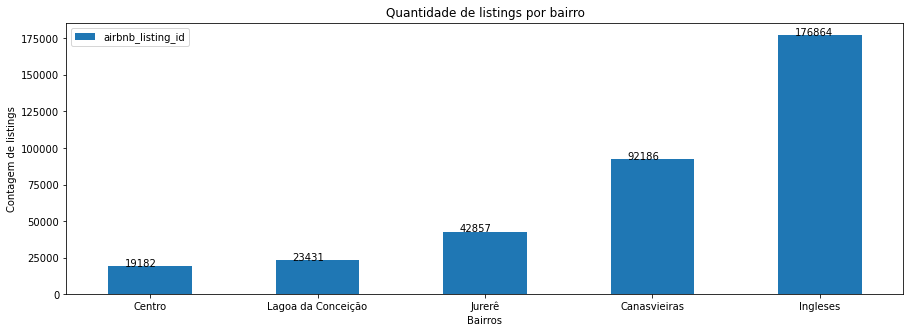

In [9]:
# gerando barplot com as informações do dataframe bairro_listing
ax = bairro_listing.plot.bar(figsize=(15, 5))
x_offset = -0.15
y_offset = 0.06
for p in ax.patches:
  b = p.get_bbox()
  val = "{:.0f}".format(b.y1 + b.y0)        
  ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
  plt.xticks(rotation=360)
  plt.xlabel('Bairros')
  plt.ylabel('Contagem de listings')
  plt.title('Quantidade de listings por bairro')

O bairro com maior quantidade de listings é Ingleses, somando uma quantidade maior que o somatório das três próximas posições.

## 2. Ordene os bairros em ordem crescente de faturamento médio dos listings


In [10]:
# criando um subset do dataframe unificado para agrupar e ordenar os bairros em ordem crescente faturamento


bairro_faturamento = df[['suburb','price_string']].groupby('suburb').mean().sort_values(by='price_string', ascending = True)
bairro_faturamento.head()

,price_string
suburb,
Centro,219.088990
Lagoa da Conceição,250.514148
Canasvieiras,292.571139
Ingleses,350.371020
Jurerê,406.074854


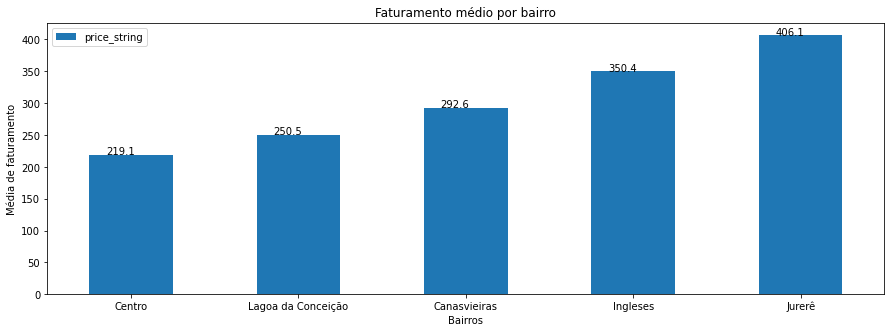

In [11]:

# gerando barplot com as informações do dataframe bairro_faturamento

ax = bairro_faturamento.plot.bar(figsize=(15, 5))
x_offset = -0.15
y_offset = 0.06
for p in ax.patches:
  b = p.get_bbox()
  val = "{:.1f}".format(b.y1 + b.y0)        
  ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
  plt.xticks(rotation=360)
  plt.xlabel('Bairros')
  plt.ylabel('Média de faturamento')
  plt.title('Faturamento médio por bairro')

Emobra apresente a maior quantidade de listings, Ingleses perde na média de faturamento para Jurerê, que se encontra em terceiro na quantidade de listings. O que indica que seria interessante pensar uma estratégia para atrair mais imóveis em Jurerê

## 3. Existem correlações entre as características de um anúncio e seu faturamento?

   ### a. Quais? Explique

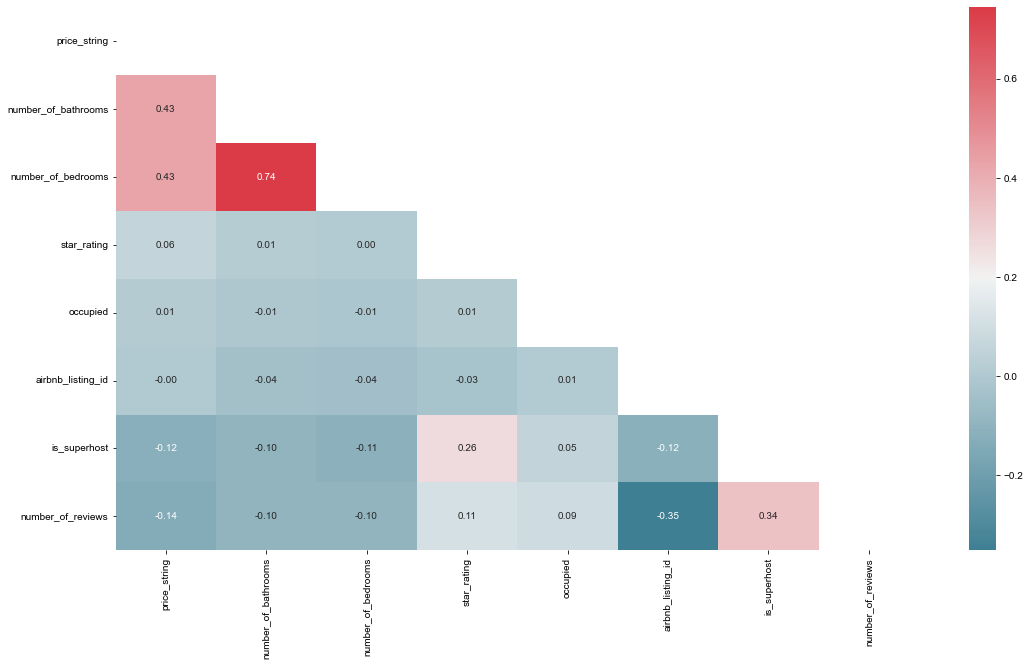

In [12]:
# gerando matriz de correlação sem valores repetidos e ordenados pela coluna price_string
corr = df.corr()
top_corr_cols = corr.price_string.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()

O faturamento dos listings apresenta correlação positiva com os números de 
quartos e banheiros. Como os outros valores de correlação sequer atingem  0.1, considera-se que não há correlação.

### 4. Qual a antecedência média das reservas?


In [13]:
#convertendo valores de data para obetos datetime para fazer cálculos de tempo
df['date'] = df['date'].astype('datetime64[ns]')
df['booked_on'] = pd.to_datetime(df['booked_on'], errors ='coerce')
df['antecedencia'] = df['date']-df['booked_on']
print('A atencedência média das resrvas é: \n', df['antecedencia'].mean())

A atencedência média das resrvas é: 
 32 days 08:26:27.787888524



#### a. Esse número é maior ou menor para finais de semana?

In [14]:
# gerando uma coluna de dia da semana para diferenciar dias úteis de fináis de semana
df['dia_da_semana'] = df['date'].dt.dayofweek

In [15]:
# separando dias úteis e finais de semana para calcular as diferenças e valores específicos para cada
semana = df.loc[df['dia_da_semana'] < 5, ['antecedencia']].mean()
fds = df.loc[df['dia_da_semana'] > 4, ['antecedencia']].mean()
diff = fds - semana
print('Antecedência média no fim de semana:  \n', fds[0])
print('\nAntecedência média durante a semana:  \n', semana[0])
print('\nDiferença das médias:  \n', diff[0])

Antecedência média no fim de semana:  
 32 days 08:53:39.479158268

Antecedência média durante a semana:  
 32 days 08:14:45.931038070

Diferença das médias:  
 0 days 00:38:53.548120198


Apresentado uma diferença de 38 minutos, é seguro dizer que, em média, não há diferença entre as antecedências para reservas durante a semana e durante o fim de semana.